# Set up and run your first Python code

## Introduction
This tutorial is intended to get you started in the course. First, you need to complete the instructions [here](README.md) to make sure you have the necessary software installed. Once you have completed the installation, you can proceed with the instructions below.

## Starting a new project from the course GitHub repository
Open DataSpell and go to File > Project From Version Control. Make sure version control is set to Git and paste the URL of the course repository (https://github.com/qtswanquist/ac547-public). **Make sure to select the option** **shallow clone with a history of 1 commit**. Select Clone. If this is your first time, you may be prompted to install git. Follow any prompts to clone the repository to your local machine.

## Setting up a Python interpreter using a virtual environment
Begin by setting up a Python environment for the course. If you are reading this in DataSpell, you may notice a prompt above to set up an interpreter. Follow that prompt or go to File > Settings > Project > Python Interpreter. Select add Python interpreter and select from local. You should see the version of Python that you installed. Check "make available to all projects" and click OK.
Note, it may take some time for background processes to update the interpreter. You can find more details on setting up a Python interpreter in DataSpell [here](https://www.jetbrains.com/help/dataspell/creating-virtual-environment.html).

## Import packages
Once you have set up your interpreter (and allowed any background updates to complete). You are ready to install packages. Look at the code chunk below. You will notice that we are importing several packages... if this is your first time using Python, you may not have these packages installed. All of the packages for this course are listed in [requirements](../requirements.txt) file in the main (root) folder of this repository. You might find a warning at the top of the screen prompting you to "install requirements." This is my preferred way for you to install packages for this course so that we are all working with the same versions. However, if you hover your cursor over the package names (e.g., `pandas`) DataSpell will prompt you to "install all packages". If you are not prompted, you can install the packages by going to Settings > Project > Python Interpreter and clicking the + button to add packages. Search for the package name (e.g., `pandas`), select the version listed in [requirements](../requirements.txt), and click install package. You will need to do this for each package listed below.

After you have installed the necessary packages (watch the progress status at the bottom of DataSpell), you can import them by "running" the code below. Note that when we import packages we frequently assign them an abbreviation to make referencing easier (e.g., import `pandas` **as pd**). This is a common convention and we will use it throughout the course. To run the chunk of code below, place your cursor in the cell and press **Shift + Enter**. Alternatively, you can click the green "play" (▶️) button in the top left corner of the cell. You can also run all cells in the notebook by going to Run > Run All.

In [8]:
import pandas as pd # Import pandas for data manipulation
import matplotlib.pyplot as plt # Import matplotlib for plotting
import seaborn as sns # Import seaborn for statistical data visualization
import statsmodels.formula.api as smf # Import statsmodels for statistical modeling

## Data analytics exercise

Next, you will complete a short data analytics exercise to make sure you are up and running. Try to follow along, but don’t worry if you get stuck or don’t understand. We will do a deeper dive into the topics later in the course. If you can get the code below to run, you are good to go for the course!

Let's begin by loading an example dataset from the Seaborn library called **anscombe's quartet**. This dataset is a classic example used to illustrate the importance of visualizing data before performing statistical analysis. You can also load datasets directly from Seaborn using the `sns.load_dataset` function. Note that if this doesn't work, we will use the `pd.read` functions to load the dataset from a local file which is included in this repo.

In [9]:
ansc_quar = sns.load_dataset('anscombe')  # Load Anscombe's dataset directly from seaborn - This is the original source of the data
# ansc_quar = pd.read_pickle('anscombe.pkl') # Load Anscombe's dataset from a local pickle file

ansc_quar.sample(10)  # Display a random sample of 10 rows from the dataset

,dataset,x,y
40,IV,19.0,12.50
39,IV,8.0,5.25
24,III,13.0,12.74
3,I,9.0,8.81
11,II,10.0,9.14
33,IV,8.0,6.58
34,IV,8.0,5.76
8,I,12.0,10.84
42,IV,8.0,7.91
5,I,14.0,9.96


Take a look at the sample from the dataset above. Notice that it contains four different datasets (i.e., **I**, **II**, **III**, and **IV**) with two variables each (i.e., `x` and `y`). Each dataset has a different relation between **x** and **y**. The goal of this exercise is to visualize the data, perform a regression analysis, and output the predicted values and residuals. Let's do some data wrangling to select only the first dataset (i.e., **I**) and keep only the `x` and `y` variables.

In [10]:
ansc_quar_i = ansc_quar[ansc_quar['dataset'] == 'I']  # Select only dataset I
ansc_quar_i = ansc_quar_i[['x', 'y']]  # Select only x and y columns
ansc_quar_i # Display the filtered dataset

,x,y
0,10.0,8.04
1,8.0,6.95
2,13.0,7.58
3,9.0,8.81
4,11.0,8.33
5,14.0,9.96
6,6.0,7.24
7,4.0,4.26
8,12.0,10.84
9,7.0,4.82


## Visualizing the data

Take another look at the dataset above. Notice that we have two separate variables (i.e., `x` and `y`) that contain a list of numbers. To visualize, let's create a scatter plot of **y** on **x** including a regression line. Again, notice that we use **plt.** and **sns.** to refer to matplotlib and seaborn imported above.

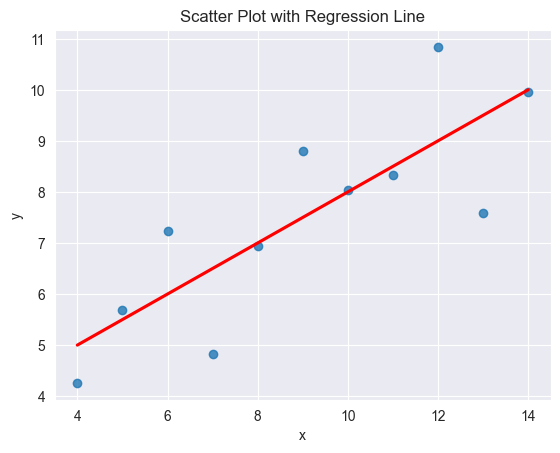

In [11]:
sns.regplot(data=ansc_quar_i,
            x='x',
            y='y',
            ci=None,
            line_kws={'color': 'red'}
            ) # Create a scatter plot with a regression line

plt.title('Scatter Plot with Regression Line') # Add a title to the plot

plt.show() # Display the plot

## Regression

Next, we will perform a simple linear regression to predict **y** using **x**. In regression parlance, we call this “a regression of **y** on **x**.” The output and warning below won't make sense to you right now, but don't worry. We will learn more about this later in the course.

In [12]:
model = smf.ols('y ~ x', data=ansc_quar_i).fit() # Fit a linear regression model using statsmodels
print(model.summary()) # Display the summary of the regression model

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.99
Date:                Sun, 28 Sep 2025   Prob (F-statistic):            0.00217
Time:                        23:57:29   Log-Likelihood:                -16.841
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0001      1.125      2.667      0.0

## Output predictions and residuals

Finally, we output the predicted (fitted) values and the residuals for each observation.

In [13]:
ansc_quar_i['fitted'] = model.fittedvalues # Add fitted values to the dataframe
ansc_quar_i['resid'] = model.resid # Add residuals to the dataframe
ansc_quar_i # Display the updated dataframe

,x,y,fitted,resid
0,10.0,8.04,8.001000,0.039000
1,8.0,6.95,7.000818,-0.050818
2,13.0,7.58,9.501273,-1.921273
3,9.0,8.81,7.500909,1.309091
4,11.0,8.33,8.501091,-0.171091
5,14.0,9.96,10.001364,-0.041364
6,6.0,7.24,6.000636,1.239364
7,4.0,4.26,5.000455,-0.740455
8,12.0,10.84,9.001182,1.838818
9,7.0,4.82,6.500727,-1.680727


Bam! Congrats on your first Python exercise! You just cleared your first hurdle to getting into the world of Python!